In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
bike_df = pd.read_csv("/content/bike_sharing.csv")
bike_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
bike_df.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,19-12-2012 23:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [13]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
bike_df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [17]:
bike_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'day_of_week', 'month'],
      dtype='object')

In [23]:
## Convert datetime and extract feautures.
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'],format = "%d-%m-%Y %H:%M")
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df['day_of_week'] = bike_df['datetime'].dt.dayofweek
bike_df['month'] = bike_df['datetime'].dt.month

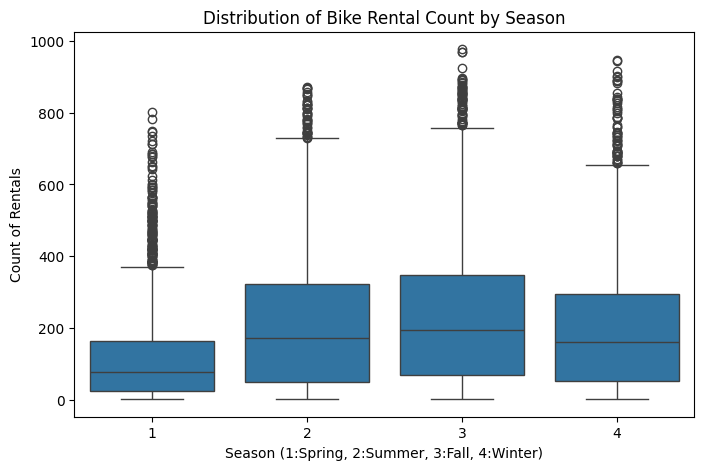

In [26]:
#Plot Distribution of 'count' by Season
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='count', data=bike_df)
plt.title('Distribution of Bike Rental Count by Season')
plt.xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Count of Rentals')
plt.show()

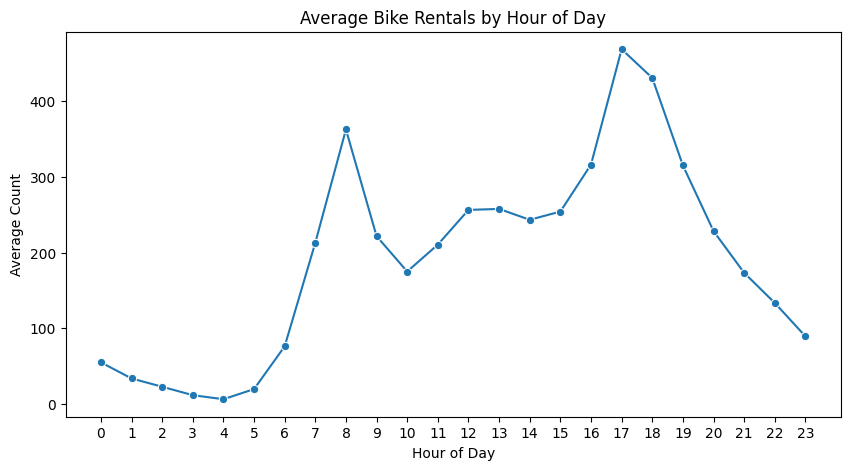

In [27]:
# Plot Average Count vs Hour
plt.figure(figsize=(10,5))
hourly_avg = bike_df.groupby('hour')['count'].mean().reset_index()
sns.lineplot(x='hour', y='count', data=hourly_avg, marker='o')
plt.title('Average Bike Rentals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.xticks(np.arange(0, 24, 1))
plt.show()

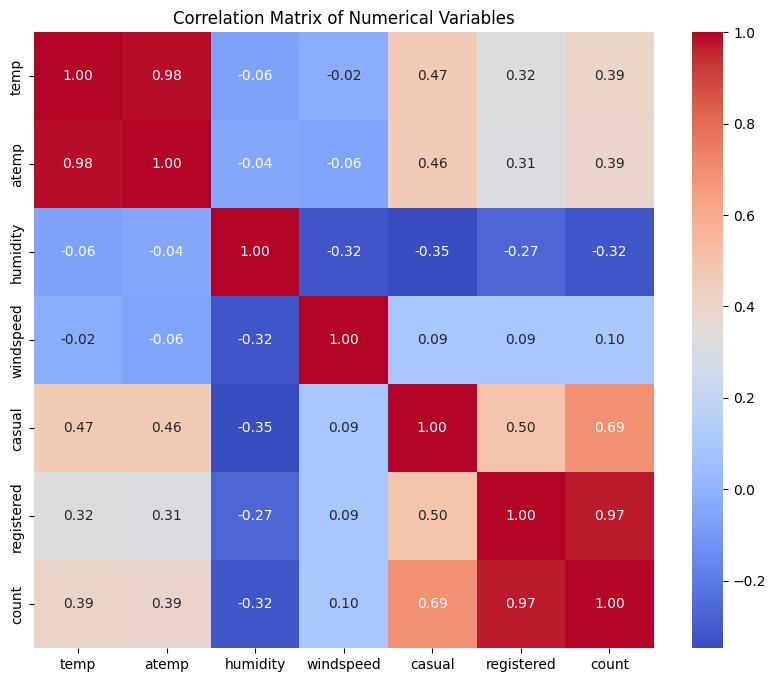

In [28]:
# Correlation Heatmap of Numerical Features
plt.figure(figsize=(10,8))
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
corr_matrix = bike_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

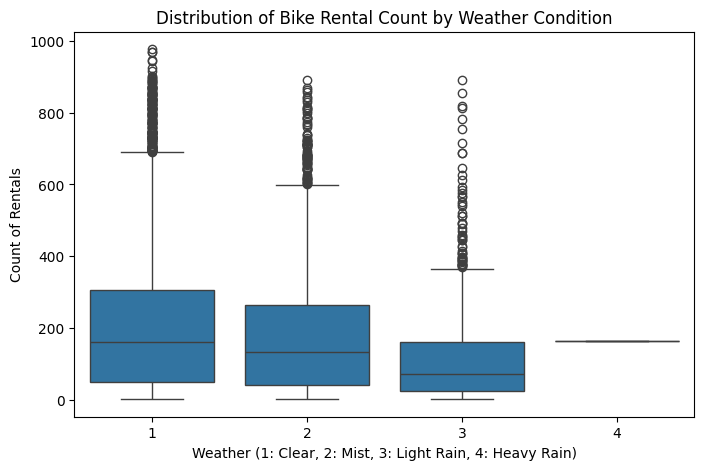

In [29]:
# Boxplot of Count vs Weather
plt.figure(figsize=(8,5))
sns.boxplot(x='weather', y='count', data=bike_df)
plt.title('Distribution of Bike Rental Count by Weather Condition')
plt.xlabel('Weather (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain)')
plt.ylabel('Count of Rentals')
plt.show()

In [30]:
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
# 1. Pearson Correlation: Numeric features vs. count
pearson_temp = pearsonr(bike_df['temp'], bike_df['count'])
pearson_humidity = pearsonr(bike_df['humidity'], bike_df['count'])
pearson_windspeed = pearsonr(bike_df['windspeed'], bike_df['count'])

In [32]:
#2. ANOVA: Categorical variables vs. count
# Season
model_season = ols('count ~ C(season)', data=bike_df).fit()
anova_season = sm.stats.anova_lm(model_season, typ=2)

In [33]:
# Holiday
model_holiday = ols('count ~ C(holiday)', data=bike_df).fit()
anova_holiday = sm.stats.anova_lm(model_holiday, typ=2)

In [34]:
# Weather
model_weather = ols('count ~ C(weather)', data=bike_df).fit()
anova_weather = sm.stats.anova_lm(model_weather, typ=2)

(pearson_temp, pearson_humidity, pearson_windspeed, anova_season, anova_holiday, anova_weather)

(PearsonRResult(statistic=np.float64(0.3944536449672491), pvalue=np.float64(0.0)),
 PearsonRResult(statistic=np.float64(-0.31737147887659456), pvalue=np.float64(2.921541663741126e-253)),
 PearsonRResult(statistic=np.float64(0.1013694702103328), pvalue=np.float64(2.8984072031553694e-26)),
                  sum_sq       df           F         PR(>F)
 C(season)  2.190083e+07      3.0  236.946711  6.164843e-149
 Residual   3.352721e+08  10882.0         NaN            NaN,
                   sum_sq       df         F    PR(>F)
 C(holiday)  1.038812e+04      1.0  0.316563  0.573692
 Residual    3.571625e+08  10884.0       NaN       NaN,
                   sum_sq       df          F        PR(>F)
 C(weather)  6.338070e+06      3.0  65.530241  5.482069e-42
 Residual    3.508348e+08  10882.0        NaN           NaN)

Interpretation:

Higher temperature → higher demand.

Higher humidity → lower demand.

Windspeed has a small positive correlation.

**ANOVA Tests (Categorical Variables vs. Count):**


Variable	F-statistic	p-value	Significant?


Season	236.95	6.16e-149	✅ Significant


Holiday	0.32	0.57	❌ Not significant


Weather	65.53	5.48e-42	✅ Significant

**Interpretation:**

Season and Weather significantly affect demand.

Holiday does not significantly affect demand.